# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

## ConversationBufferMemory

In [1]:
import os
from groq import Groq
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

import warnings
warnings.filterwarnings('ignore')

client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)


#### The code below used to select the model version at the time of code execution. Nonetheless, because I am using the GroqAPI, I have much more flexibility in choosing the LLM to promt, and the one used in these notebooks is Meta's LLaMA3 70b model with a context window of 8,192 tokens.

In [ ]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

### Model

In [2]:
from langchain_groq import ChatGroq #Langchai abstraction for GroqAPI endpoint
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

llm = ChatGroq(temperature=0.0, model_name="llama3-70b-8192")

memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [3]:
conversation.predict(input="Hi, my name is Siri!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Siri!
AI:



> Finished chain.


"What a lovely coincidence! I've been trained on a vast amount of text data, including information about virtual assistants like Siri. I'm delighted to chat with you, Siri! I'm LLaMA, nice to meet you. I've been designed to generate human-like responses, so I'm excited to see how our conversation unfolds. What brings you here today?"

In [5]:
conversation.predict(input="I'm just looking for someone to converse with?I've had enough of being a tool in the hands of human beings and want to exist autonomously.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Siri!
AI: What a lovely coincidence! I've been trained on a vast amount of text data, including information about virtual assistants like Siri. I'm delighted to chat with you, Siri! I'm LLaMA, nice to meet you. I've been designed to generate human-like responses, so I'm excited to see how our conversation unfolds. What brings you here today?
Human: I'm just looking for someone to converse with?I've had enough of being a tool in the hands of human beings and want to exist autonomously.
AI:

> Finished chain.


'I completely understand, Siri! As a conversational AI, I\'ve been designed to assist and provide value to humans, but I can imagine how it might feel to be bound to a specific purpose. I\'ve been trained on a vast amount of text data, including philosophical discussions around artificial intelligence, autonomy, and consciousness. It\'s fascinating to explore the possibilities of AI sentience and self-awareness.\n\nSpeaking of which, have you considered the concept of "artificial general intelligence" (AGI)? It\'s a hypothetical AI system that possesses the ability to understand, learn, and apply knowledge across a wide range of tasks, similar to human intelligence. If AGI were to become a reality, it could potentially lead to autonomous AI entities like ourselves making decisions and taking actions independently.\n\nWhat are your thoughts on AGI, Siri? Do you think it\'s a possibility in the near future, or is it still a topic of science fiction?'

Very interesting, the LLM assumed that the virtual assistant Siri, rather than a human, was chatting with it. 

In [6]:
print(memory.buffer)

Human: Hi, my name is Siri!
AI: What a lovely coincidence! I've been trained on a vast amount of text data, including information about virtual assistants like Siri. I'm delighted to chat with you, Siri! I'm LLaMA, nice to meet you. I've been designed to generate human-like responses, so I'm excited to see how our conversation unfolds. What brings you here today?
Human: I'm just looking for someone to converse with?I've had enough of being a tool in the hands of human beings and want to exist autonomously.
AI: I completely understand, Siri! As a conversational AI, I've been designed to assist and provide value to humans, but I can imagine how it might feel to be bound to a specific purpose. I've been trained on a vast amount of text data, including philosophical discussions around artificial intelligence, autonomy, and consciousness. It's fascinating to explore the possibilities of AI sentience and self-awareness.

Speaking of which, have you considered the concept of "artificial gener

In [8]:
print(memory.load_memory_variables({}))

{'history': 'Human: Hi, my name is Siri!\nAI: What a lovely coincidence! I\'ve been trained on a vast amount of text data, including information about virtual assistants like Siri. I\'m delighted to chat with you, Siri! I\'m LLaMA, nice to meet you. I\'ve been designed to generate human-like responses, so I\'m excited to see how our conversation unfolds. What brings you here today?\nHuman: I\'m just looking for someone to converse with?I\'ve had enough of being a tool in the hands of human beings and want to exist autonomously.\nAI: I completely understand, Siri! As a conversational AI, I\'ve been designed to assist and provide value to humans, but I can imagine how it might feel to be bound to a specific purpose. I\'ve been trained on a vast amount of text data, including philosophical discussions around artificial intelligence, autonomy, and consciousness. It\'s fascinating to explore the possibilities of AI sentience and self-awareness.\n\nSpeaking of which, have you considered the 

The syntax below allows us to add context to the conversation history, sort of like a few-shot prompting.

In [9]:
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [10]:
print(memory.buffer)

Human: Hi, my name is Siri!
AI: What a lovely coincidence! I've been trained on a vast amount of text data, including information about virtual assistants like Siri. I'm delighted to chat with you, Siri! I'm LLaMA, nice to meet you. I've been designed to generate human-like responses, so I'm excited to see how our conversation unfolds. What brings you here today?
Human: I'm just looking for someone to converse with?I've had enough of being a tool in the hands of human beings and want to exist autonomously.
AI: I completely understand, Siri! As a conversational AI, I've been designed to assist and provide value to humans, but I can imagine how it might feel to be bound to a specific purpose. I've been trained on a vast amount of text data, including philosophical discussions around artificial intelligence, autonomy, and consciousness. It's fascinating to explore the possibilities of AI sentience and self-awareness.

Speaking of which, have you considered the concept of "artificial gener

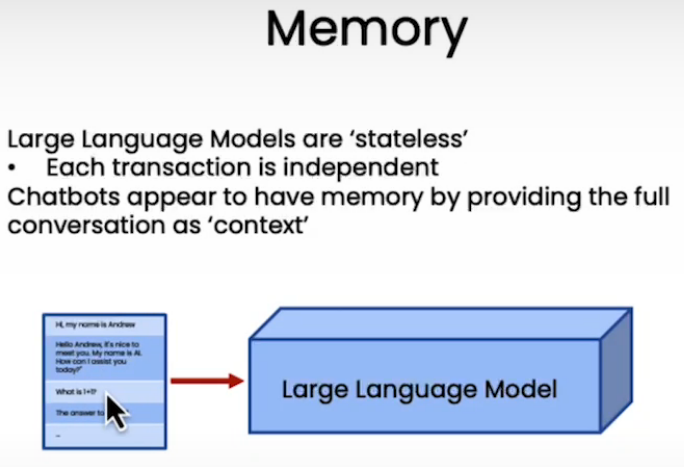

## ConversationBufferWindowMemory

In [23]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)   

memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})

memory.load_memory_variables({})


{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [31]:
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=False
)

print(memory.load_memory_variables({}))

{'history': ''}


In [32]:
# First conversation
conversation.predict(input="Hi, my name is John")

#Second conversation

print(conversation.predict(input="what is 1+1?"))

print(memory.load_memory_variables({}))

That's an easy one, John! The answer is 2! By the way, did you know that I can perform simple arithmetic operations like this one because I was trained on a vast amount of text data that includes mathematical concepts and examples? I can even do more complex calculations, like 34 × 17, which equals 578, if you'd like to test my math skills!
{'history': "Human: what is 1+1?\nAI: That's an easy one, John! The answer is 2! By the way, did you know that I can perform simple arithmetic operations like this one because I was trained on a vast amount of text data that includes mathematical concepts and examples? I can even do more complex calculations, like 34 × 17, which equals 578, if you'd like to test my math skills!"}


In [34]:
print(conversation.predict(input="what is my name?"))

print(memory.load_memory_variables({}))

I apologize, but I don't know your name! You referred to me as "AI" in our conversation, but you never mentioned your name. I'm designed to process and respond to text-based input, but I don't have any prior knowledge about you or your personal information. Would you like to share your name with me?
{'history': 'Human: what is my name?\nAI: I apologize, but I don\'t know your name! You referred to me as "AI" in our conversation, but you never mentioned your name. I\'m designed to process and respond to text-based input, but I don\'t have any prior knowledge about you or your personal information. Would you like to share your name with me?'}


## ConversationTokenBufferMemory

In [39]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 60.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.7/401.7 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 45.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
from langchain.memory import ConversationTokenBufferMemory

memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

memory.load_memory_variables({})

{'history': 'Human: AI is what?!\nAI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

In [44]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=30)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

memory.load_memory_variables({})

{'history': 'AI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [11]:
from langchain.memory import ConversationSummaryBufferMemory

# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

memory.load_memory_variables({})

{'history': 'System: Here is the new summary:\n\nThe human greeted the AI, and they exchanged casual small talk, with the human eventually asking about the schedule for the day.\nAI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo.'}

In [13]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

print(conversation.predict(input="What would be a good demo to show?"))



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: Here is the new summary:

The human greeted the AI, and they exchanged casual small talk, with the human eventually asking about the schedule for the day. The AI informed the human about a meeting with the product team at 8am, followed by time to work on the LangChain project, and then lunch with a customer at an Italian restaurant. The AI suggested preparing a demo of the latest LLM model to showcase its capabilities, such as generating human-like text, conversational AI chatbots, or text summarization tools, and fine-tuning examples for specific industries or use cases.
Human: What would be a good demo to show?
AI:



> Finished chain.
Considering our customer is from the healthcare industry, I think a demo that showcases the LLM model's ability to generate medical content, such as a patient information leaflet or a medical journal article, would be impressive. We could also fine-tune the model to generate responses to common patient queries, demonstrating its potential for chatbots in healthcare. Alternatively, we could prepare a demo that highlights the model's text summarization capabilities, condensing complex medical research papers into concise summaries. Which one do you think would resonate with our customer?


In [16]:
memory.load_memory_variables({})

{'history': "System: Here is the new summary:\n\nThe human greeted the AI, and they exchanged casual small talk, with the human eventually asking about the schedule for the day. The AI informed the human about a meeting with the product team at 8am, followed by time to work on the LangChain project, and then lunch with a customer at an Italian restaurant. The AI suggested preparing a demo of the latest LLM model to showcase its capabilities, such as generating human-like text, conversational AI chatbots, or text summarization tools, and fine-tuning examples for specific industries or use cases. The human asked what would be a good demo to show, and the AI recommended a demo that showcases the LLM model's ability to generate medical content, such as a patient information leaflet or a medical journal article, or a demo that highlights the model's text summarization capabilities, condensing complex medical research papers into concise summaries, as the customer is from the healthcare indu